# Anexo

In [97]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sea
import yfinance as yf

## 1-) a-) $CO_2$ Trend in Mauna

### Data preparation

In [24]:
df_1 = pd.read_fwf('CO2 trend in Mauna.txt')
df_1.columns = ['year', 'month','decimal date', 'monthly average', 'de-seasonalized', 'days', 'st. dev of days', 'unc. of mon mean' ]
df_1.index = df_1['month'].map(str) + '-'+ df_1['year'].map(str)
df_1.index = pd.to_datetime(df_1.index, format = '%m-%Y').to_period('M')
df_1

,year,month,decimal date,monthly average,de-seasonalized,days,st. dev of days,unc. of mon mean
1958-03,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1958-04,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
1958-06,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
1958-07,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
2021-03,2021,3,2021.2083,417.64,416.14,28,0.86,0.31
2021-04,2021,4,2021.2917,419.05,416.23,24,1.12,0.44
2021-05,2021,5,2021.3750,419.13,415.71,28,0.90,0.33
2021-06,2021,6,2021.4583,418.94,416.58,28,0.65,0.23


### Data Visualization

In [51]:
df_1.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10',
             ...
             '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06', '2021-07'],
            dtype='period[M]', name='Date', length=259, freq='M')

In [82]:
df_1.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10',
             ...
             '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06', '2021-07'],
            dtype='period[M]', name='Date', length=259, freq='M')

<Figure size 432x288 with 0 Axes>

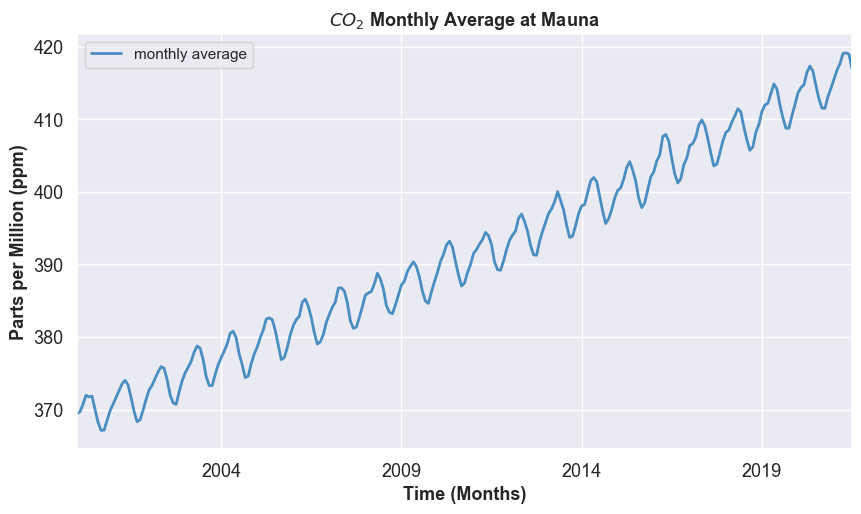

In [250]:
#2000-2021
df_1 = df_1['2000':].copy()
df_1.index.name = 'Date'

#Style
plt.figure()
sea.set_style('darkgrid', {'axes.grid': True})
df_1.reset_index().plot(kind = 'line',x = 'Date', y = 'monthly average',  color = 'tab:blue', markersize = 2, linewidth = 2, alpha = 0.8)

#Label
plt.xlabel('Time (Months)', fontsize = 13,  fontweight = 'bold')
plt.ylabel('Parts per Million (ppm)', fontsize = 13,  fontweight = 'bold')
plt.title('$CO_2$ Monthly Average at Mauna ', fontweight = 'bold', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
#plt.xticks(np.arange(2000,2021,1))

#Setting
plt.gcf().set_size_inches(10,5.5)
plt.gcf().set_dpi(100)

### Equations to smooth time series by polinomial and harmonic regression
### $\large y_t =\beta_0 + \beta_1 t + \cdots + \beta_nt^n + \epsilon_t$
### $\large y_t = a_1 sen(2\pi\omega_1 t) + b_1 cos(2\pi\omega_1 t) + \cdots + a_n sen(2\pi\omega_n t) + b_n cos(2\pi\omega_n t) + \epsilon_t$

### Time Serie Analysis

## 1-) b-) $ NO_2$ Global Trend 

### Data Preparation

In [66]:
df_no2 = pd.read_fwf('NO2 global trend.txt')
df_no2.index = pd.to_datetime(df_no2['year'].map(str) +'-' + df_no2['month'].map(str), format ='%Y-%m' )
df_no2.inde = df_no2.index.to_period('M')
df_no2.index.name = 'Date'
df_no2

C:\Users\Rodolfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,year,month,decimal,average,average_unc,trend,trend_unc
Date,,,,,,,
2001-01-01,2001,1,2001.042,316.3,0.2,316.0,0.1
2001-02-01,2001,2,2001.125,316.3,0.2,316.1,0.1
2001-03-01,2001,3,2001.208,316.2,0.2,316.2,0.1
2001-04-01,2001,4,2001.292,316.1,0.1,316.2,0.1
2001-05-01,2001,5,2001.375,316.1,0.1,316.3,0.1
...,...,...,...,...,...,...,...
2021-01-01,2021,1,2021.042,333.9,0.2,333.8,0.2
2021-02-01,2021,2,2021.125,334.0,-9.9,333.9,-9.9
2021-03-01,2021,3,2021.208,334.1,-9.9,334.0,-9.9


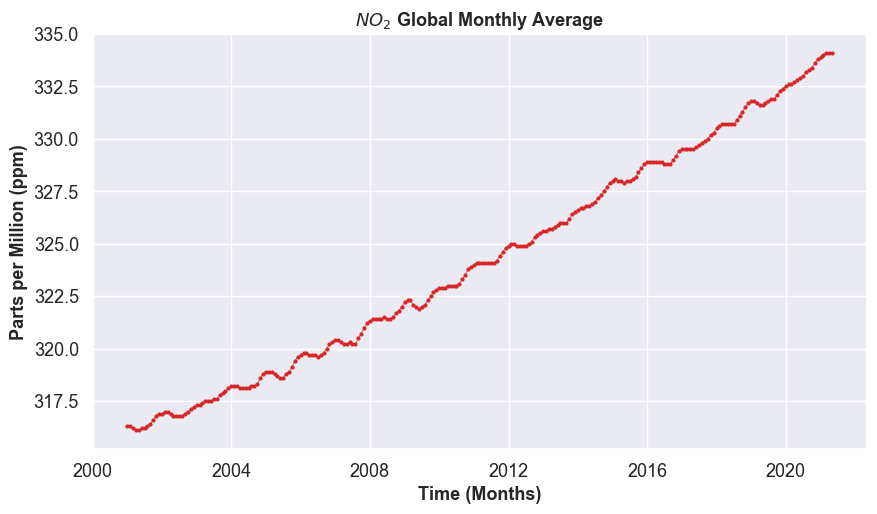

In [251]:
#2001-2021

#Style
plt.figure()
sea.set_style('darkgrid', {'axes.grid': True})
plt.plot(df_no2.index,df_no2['average'], '-o', color = 'tab:red', markersize = 2, linewidth = 0.5)

#Label
plt.xlabel('Time (Months)', fontsize = 13,  fontweight = 'bold')
plt.ylabel('Parts per Million (ppm)', fontsize = 13,  fontweight = 'bold')
plt.title('$NO_2$ Global Monthly Average', fontweight = 'bold', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
#plt.xticks(np.arange(2000,2021,1))

#Setting
plt.gcf().set_size_inches(10,5.5)
plt.gcf().set_dpi(100)

## 2-) IBOVESPA

In [111]:
df_ibov = yf.download('^BVSP', start = '2005-01-02', end = '2021-09-08').rename(columns = {'Adj Close': 'IBOV Index'})
df_ibov

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,IBOV Index,Volume
Date,,,,,,
2005-01-03,26193.0,26492.0,25671.0,25722.0,25722.0,0
2005-01-04,25722.0,25873.0,24791.0,24848.0,24848.0,0
2005-01-05,24859.0,25001.0,24523.0,24692.0,24692.0,0
2005-01-06,24695.0,24808.0,24250.0,24367.0,24367.0,0
2005-01-07,24376.0,24874.0,24376.0,24747.0,24747.0,0
...,...,...,...,...,...,...
2021-08-31,119738.0,120157.0,117911.0,118781.0,118781.0,11535600
2021-09-01,118793.0,119942.0,118067.0,119396.0,119396.0,9523000
2021-09-02,119394.0,119397.0,116534.0,116677.0,116677.0,9862800


<Figure size 432x288 with 0 Axes>

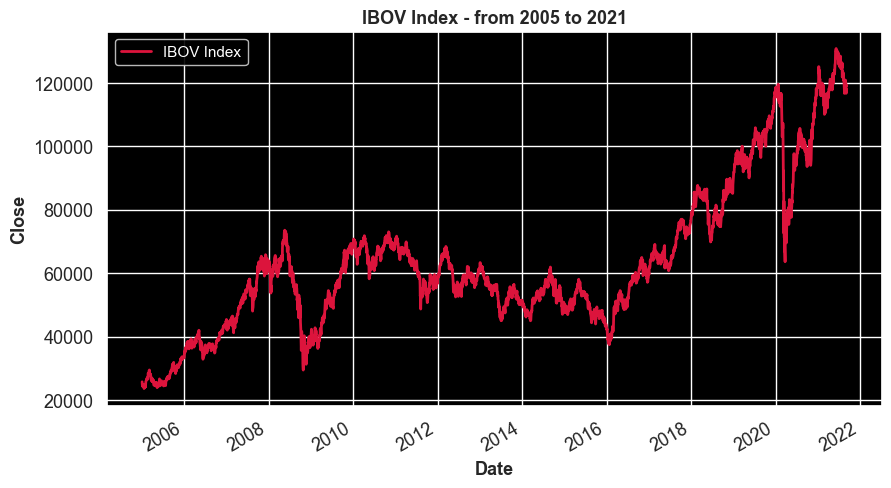

In [252]:
df_ibov = df_ibov[['IBOV Index']]

#PLot
sea.set(rc = {'axes.facecolor':'black'} )
plt.figure()
df_ibov.plot(color = 'crimson', linewidth = 2)

#Label
plt.xlabel('Date', fontsize = 13,  fontweight = 'bold')
plt.ylabel('Close', fontsize = 13,  fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('IBOV Index - from 2005 to 2021', fontweight = 'bold', fontsize = 13)
legend = plt.legend(loc = 'best', shadow = False, frameon = True, framealpha = 0.9)

#Setting
plt.setp(legend.get_texts(), color = 'white')
plt.gcf().set_size_inches(10,5.5)
plt.gcf().set_dpi(100)

### B-) Log- returns

### $E(y_t) = \mu$
### $Var(y_t) = \sigma^2$

In [156]:
#Computing returns
returns = df_ibov.pct_change().drop(df_ibove.index[0], axis = 0).assign(log_return = lambda x: np.log(1+ x['IBOV Index']))['log_return']
returns

Date
2005-01-04   -0.034569
2005-01-05   -0.006298
2005-01-06   -0.013250
2005-01-07    0.015475
2005-01-10   -0.018557
                ...   
2021-08-31   -0.008041
2021-09-01    0.005164
2021-09-02   -0.023036
2021-09-03    0.002192
2021-09-06    0.007973
Name: log_return, Length: 4120, dtype: float64

[None, None]

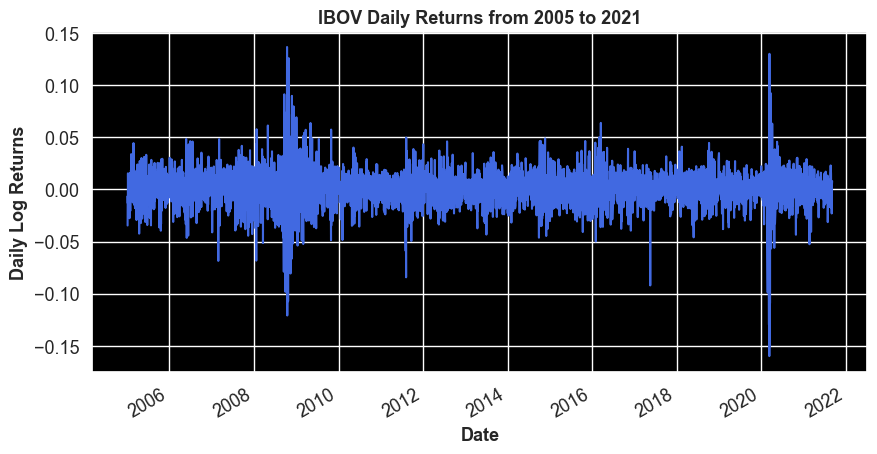

In [253]:
#Plotting log returns of IBOV
plt.figure()
returns.plot(color = 'royalblue',  )

#Label
plt.xlabel('Date', fontsize = 13, fontweight = 'bold')
plt.ylabel('Daily Log Returns', fontsize = 13,  fontweight = 'bold')
plt.title('IBOV Daily Returns from 2005 to 2021', fontweight = 'bold', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#Setting
plt.gcf().set_size_inches(10,5)
plt.gcf().set_dpi(100)
plt.setp(legend.get_texts(), color = 'white')

### C-) Explanatory Data Analysis (EDA)

[None, None]

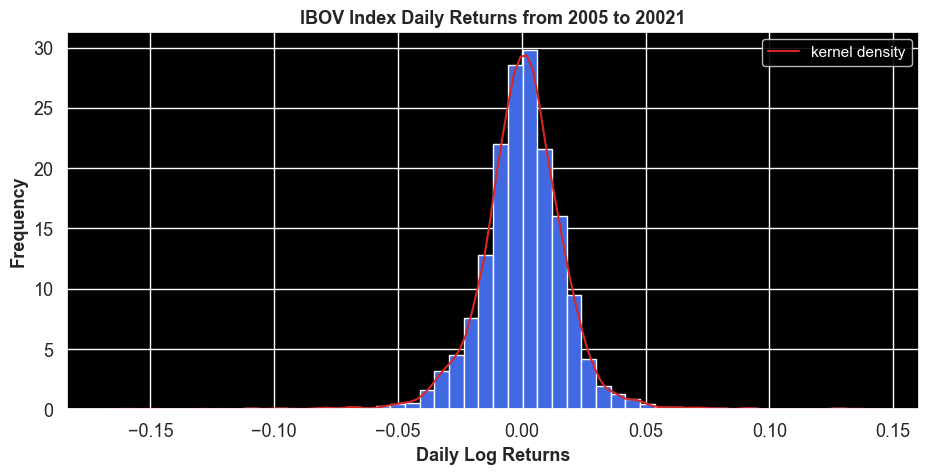

In [255]:
#Log-returns distribution
plt.hist(returns, bins= 50, density= True, color = 'royalblue')
sea.kdeplot(returns, color = 'tab:red', alpha = 1, label= 'kernel density')

#Label
plt.xlabel('Daily Log Returns', fontsize = 13,  fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 13,  fontweight = 'bold')
plt.title('IBOV Index Daily Returns from 2005 to 20021', fontweight = 'bold', fontsize = 13)
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#setting
plt.gcf().set_size_inches(11, 5)
plt.gcf().set_dpi(100)
plt.setp(legend.get_texts(), color = 'white')

In [175]:
#Kurtosis and Skewness
kurtosis = scipy.stats.kurtosis(returns)
skewness = scipy.stats.skew(returns)

print('Kurtosis:', kurtosis)
print('Skweness:', skewness)


Kurtosis: 9.06436377839304
Skweness: -0.4439801001082919


In [176]:
#Normality Test
#Using Shapiro-Wilk test to evaluate my data population in order to figure out whether or not my sample data proceeds a Gaussian distribution (sugested to sample size N< 5000)
stat,p = scipy.stats.shapiro(returns) 
alpha = 0.05
if  p < alpha:
    print("p-value {} and test statistic {}. The data dont'n follow a Gaussian distribution".format(p, stat))
if p > alpha:
    print("p-value {} and test statistic {}. I can't conclude the data do not follow a Gaussian shape".format(p,stat))

p-value 1.6294298543168973e-41 and test statistic 0.9238964319229126. The data dont'n follow a Gaussian distribution


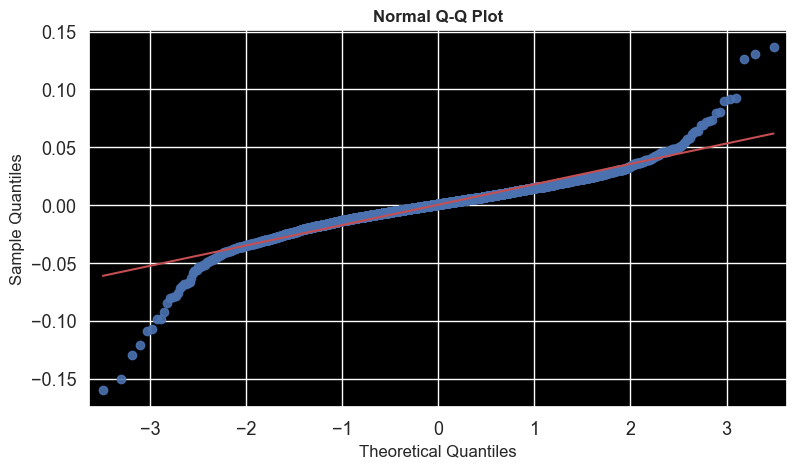

In [257]:
#Q-Q Ploting in order to figure out if the dataset fits a standadr normal distribution

import statsmodels.graphics.gofplots as stmod
stmod.qqplot(returns, line = 's',  alpha = 0.9, linewidth = 5)
plt.gcf().set_size_inches(7,5)
plt.title('Normal Q-Q Plot', fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#SETTING
plt.gcf().set_size_inches(9,5)
plt.gcf().set_dpi(100)

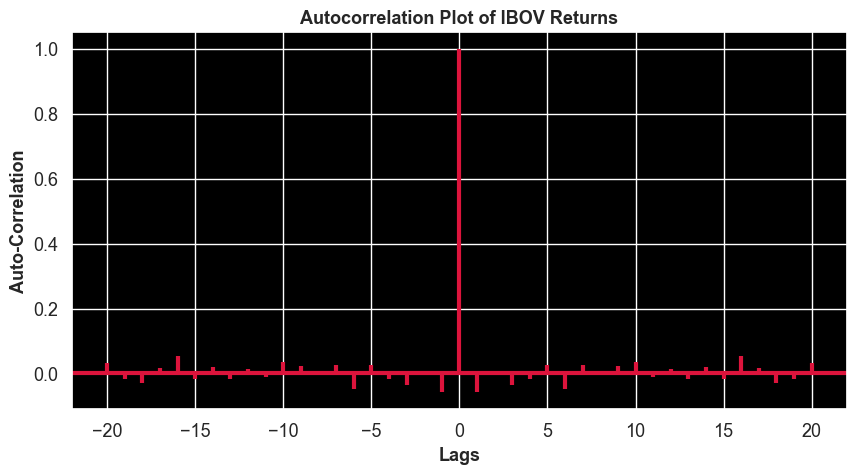

In [258]:
#Correlogram (auto-correlationm)

#Plotting the autocorrelation plot
plt.figure()
plt.acorr(returns, maxlags = 20, color = 'crimson', linewidth = 3)

#Labels
plt.title('Autocorrelation Plot of IBOV Returns', fontweight = 'bold', fontsize = 13)
plt.xlabel('Lags', fontsize = 13, fontweight = 'bold')
plt.ylabel('Auto-Correlation', fontsize = 13,  fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#Setting

plt.gcf().set_size_inches(10,5)
plt.gcf().set_dpi(100)


#### Stationary properties
#### $\large
p(k) =
\begin{cases}
1,  & \text{if $k = 0$} \\[2ex]
0, & \text{if $k = \pm 1, \pm 2, \cdots$}
\end{cases}
$
* $\large -1 \lt p(k) \gt +1$
* $\large  p(k) = p(-k)$

In [225]:
#Station
from statsmodels.tsa.stattools import adfuller
stationary_test = adfuller(returns)
print('ADF Statistic: %f' % stationary_test[0])
print('p-value: %f' % stationary_test[1])
print('Critical Values:')

for key, value in stationary_test[4].items():
    print('\t%s: %.3f' % (key, value))

p = stationary_test[1]
alpha = 0.05
if  p > alpha:
    print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")
if p < alpha:
    print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")

ADF Statistic: -13.390277
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [238]:
returns

Date
2005-01-04   -0.034569
2005-01-05   -0.006298
2005-01-06   -0.013250
2005-01-07    0.015475
2005-01-10   -0.018557
                ...   
2021-08-31   -0.008041
2021-09-01    0.005164
2021-09-02   -0.023036
2021-09-03    0.002192
2021-09-06    0.007973
Name: log_return, Length: 4120, dtype: float64

[None, None]

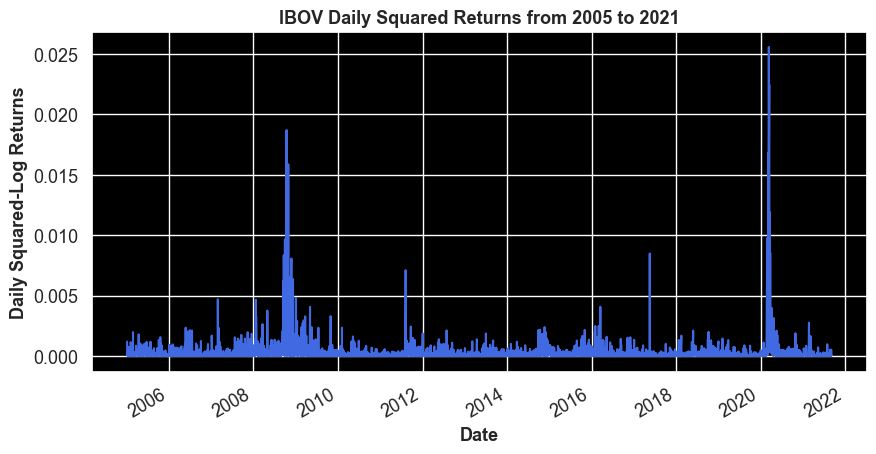

In [259]:
##Plotting squared log returns of IBOV
plt.figure()
(returns**2).plot(color = 'royalblue',  )

#Label
plt.xlabel('Date', fontsize = 13,  fontweight = 'bold')
plt.ylabel('Daily Squared-Log Returns', fontsize = 13,  fontweight = 'bold')
plt.title('IBOV Daily Squared Returns from 2005 to 2021', fontweight = 'bold', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#Setting
plt.gcf().set_size_inches(10,5)
plt.gcf().set_dpi(100)
plt.setp(legend.get_texts(), color = 'white')

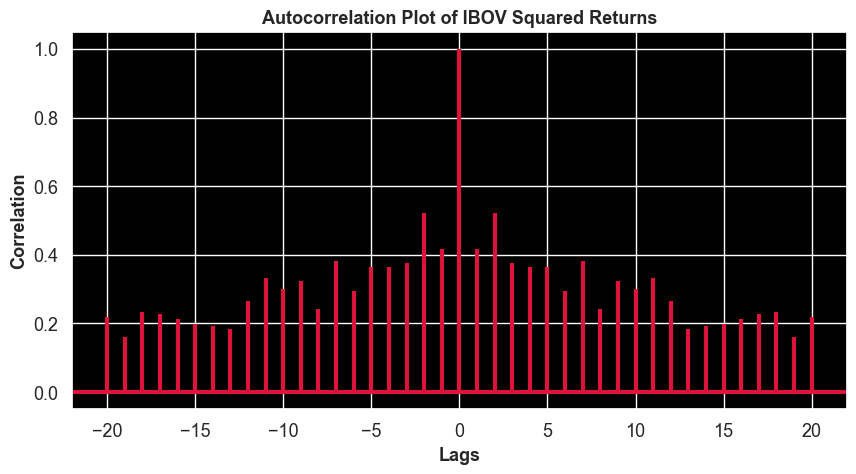

In [260]:
#Correlogram (auto-correlationm)

#Plotting the autocorrelation plot
plt.figure()
plt.acorr(returns**2, maxlags = 20, color = 'crimson', linewidth = 3)

#Labels
plt.title('Autocorrelation Plot of IBOV Squared Returns', fontweight = 'bold', fontsize = 13)
plt.xlabel('Lags', fontsize = 13,  fontweight = 'bold')
plt.ylabel('Correlation', fontsize = 13,  fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#Setting

plt.gcf().set_size_inches(10,5)
plt.gcf().set_dpi(100)
